# Problem statement :
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score as sil

In [2]:
#Load dataset
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
wine.duplicated().sum()

0

In [6]:
wineData=wine.iloc[:,1:]

In [7]:
wineArray=wineData.values

In [8]:
wineArray

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Data preprocessing

In [9]:
#Normalizing data
wineNorm=scale(wineArray)

In [10]:
wineNorm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [11]:
pca=PCA()
winePca=pca.fit_transform(wineNorm)

In [12]:
winePca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [13]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [14]:
Var=pca.explained_variance_ratio_

In [15]:
Var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

<BarContainer object of 13 artists>

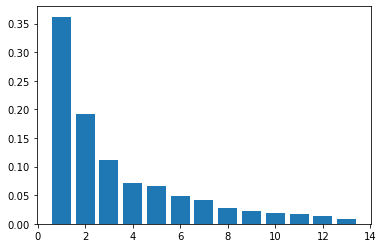

In [16]:
plt.bar(range(1,len(Var)+1),Var)

In [17]:
#cumulative variance
Var1=np.cumsum(np.round(Var,decimals=4)*100)
Var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

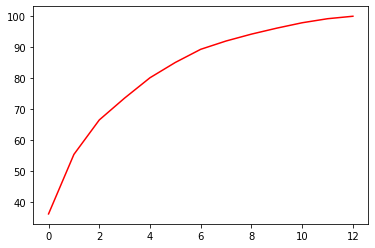

In [18]:
# Variance plot for PCA components obtained 
plt.plot(Var1,color="red")

In [19]:
wineData.shape

(178, 13)

In [20]:
winePca.shape

(178, 13)

In [21]:
wineFinal=pd.concat([pd.DataFrame(winePca[:,0:3],columns=['pc1','pc2','pc3']),wine[["Type"]]],axis=1)

In [22]:
wineFinal

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


# Herarchical Clustering

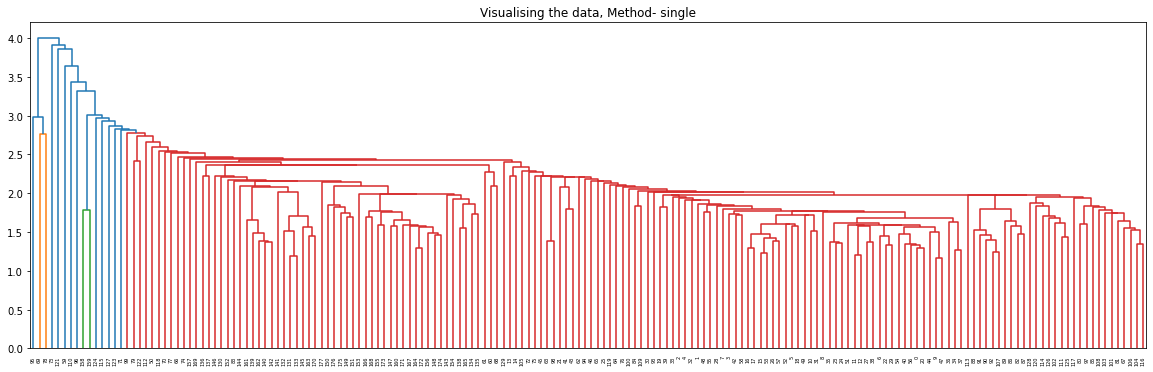

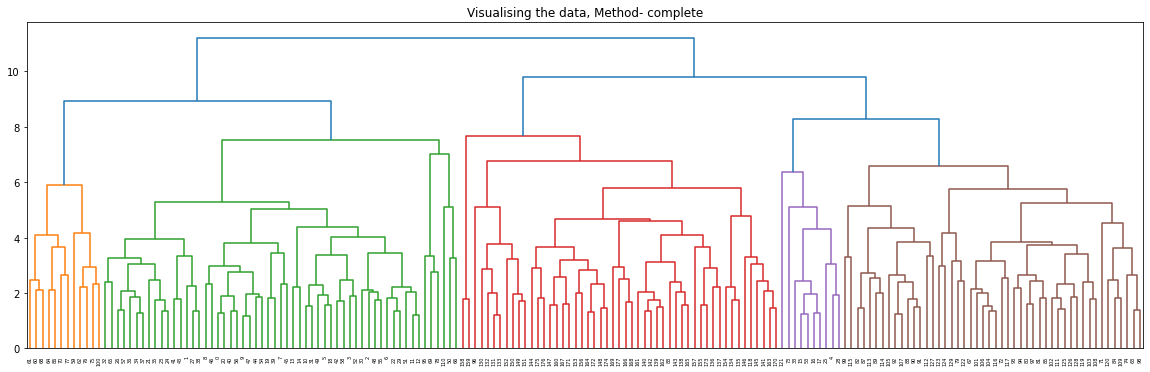

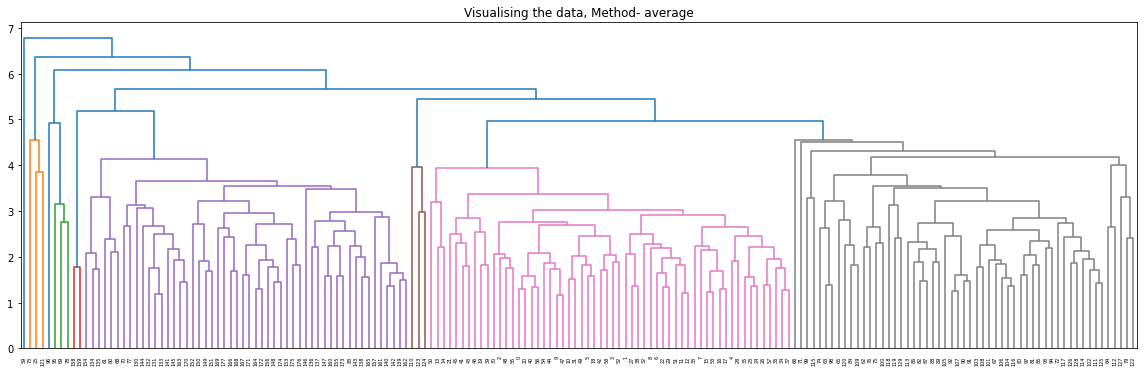

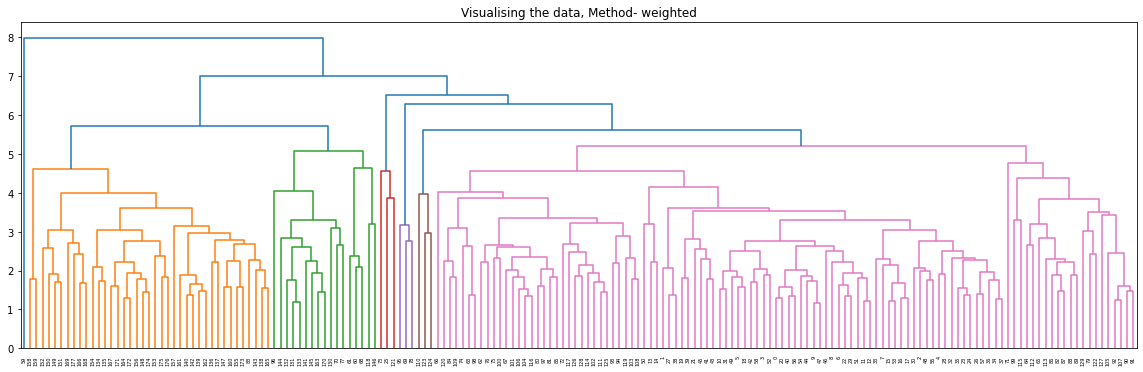

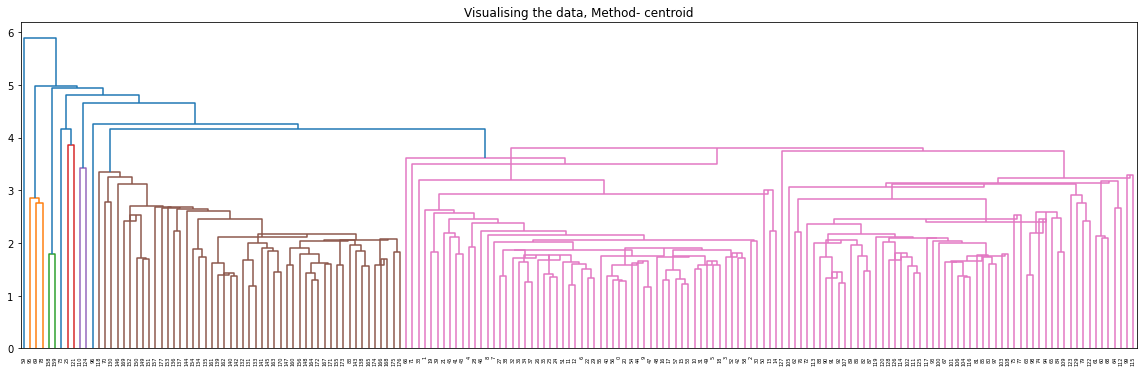

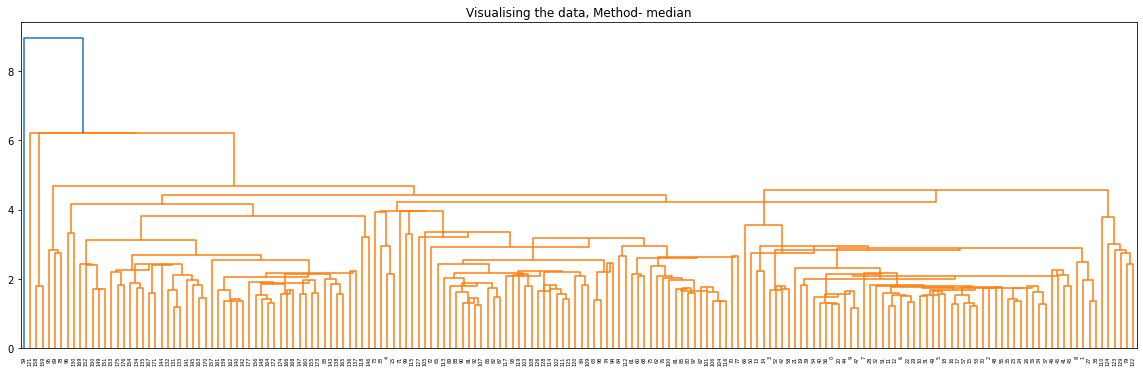

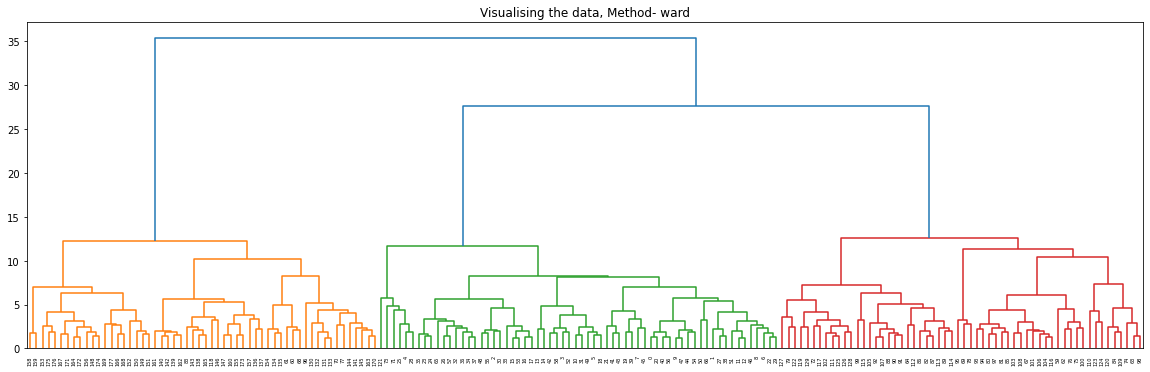

In [23]:
# Create dendrogram of Normalized data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(wineNorm, method = methods,optimal_ordering=False))

In [24]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'ward')

    y=hc.fit_predict(wineNorm)
    sc_score.append(sil(wineNorm,y))

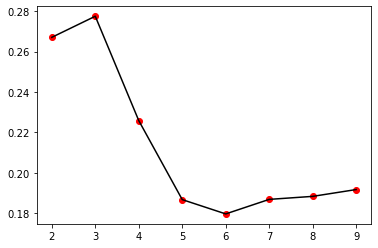

In [25]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

By seeing dendrogram and silhouette score the best number of cluster we are getting is 3 and linkage method is ward

In [26]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters
y_hc=hclusters.fit_predict(wineNorm)

In [27]:
wine1=wine

In [28]:
wine1['Norm_hcluster']=y_hc

In [29]:
wine1['Norm_hcluster'].value_counts()

2    64
0    58
1    56
Name: Norm_hcluster, dtype: int64

In [30]:
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Norm_hcluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


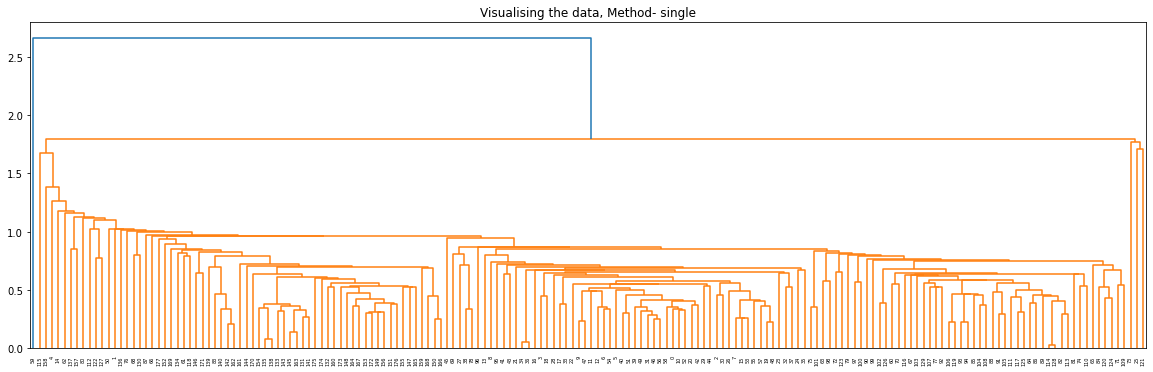

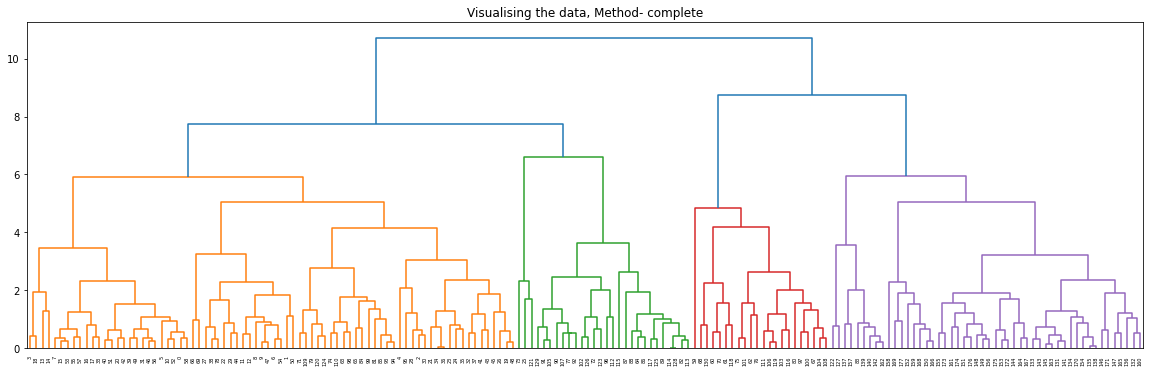

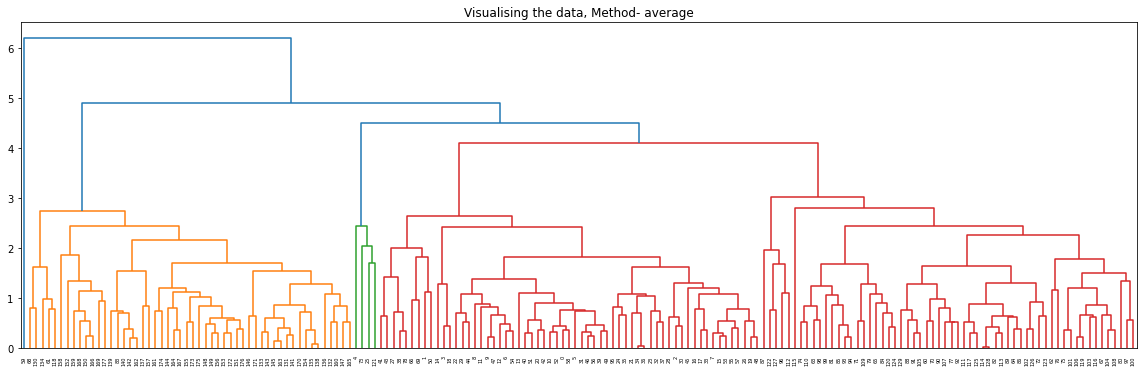

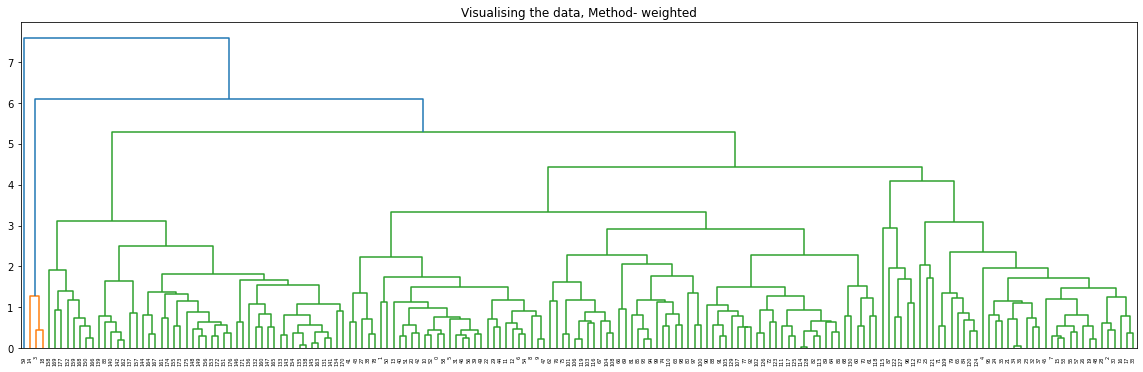

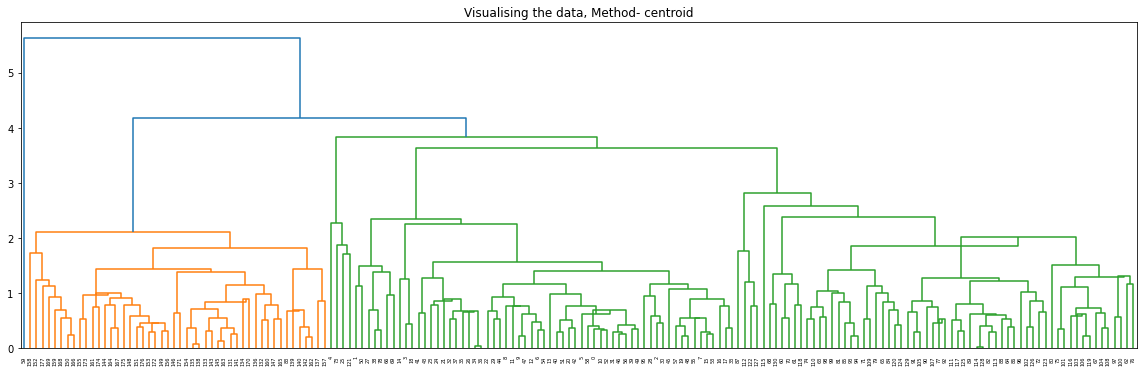

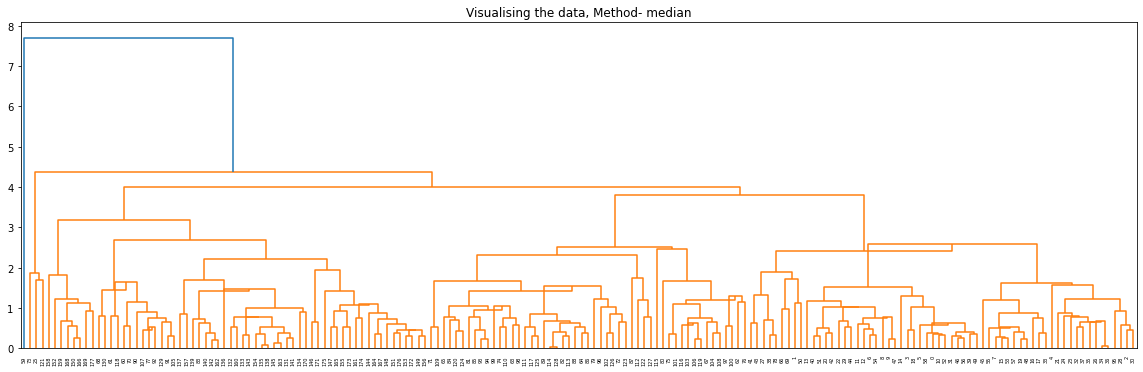

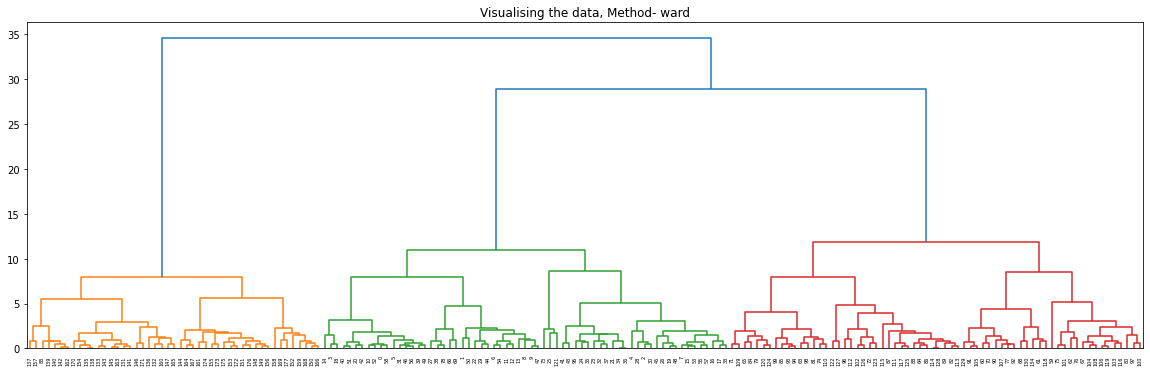

In [31]:
# Create dendrogram of pca data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(wineFinal.iloc[:,0:3], method = methods,optimal_ordering=False))

In [32]:
nc1=[2,3,4,5,6,7,8,9]
sc_score1=[]    
for i in nc1:
    hc1 = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'ward')

    y=hc1.fit_predict(wineNorm)
    sc_score1.append(sil(wineFinal.iloc[:,0:3],y))

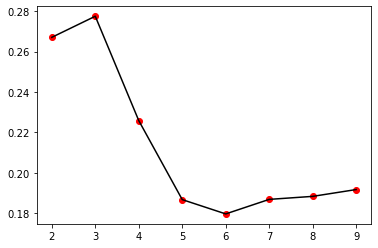

In [33]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

By seeing dendrogram and silhouette score the best number of cluster we are getting is 3 and linkage method is ward

In [34]:
hclusters1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hclusters1.fit_predict(wineFinal.iloc[:,0:3])

In [35]:
wine2=wine

In [36]:
wine2['pca_hcluster']=y_hc

In [37]:
wine2['pca_hcluster'].value_counts()

0    66
2    65
1    47
Name: pca_hcluster, dtype: int64

In [38]:
print("PCA having 3 features:-\n ",wine2['pca_hcluster'].value_counts())
print( "Norm:- \n",wine1['Norm_hcluster'].value_counts())

PCA having 3 features:-
  0    66
2    65
1    47
Name: pca_hcluster, dtype: int64
Norm:- 
 2    64
0    58
1    56
Name: Norm_hcluster, dtype: int64


# Conclusion 
1.As we see there is not so much difference between Pca data and normal data when we are doing clustering

2.In herarchical clustering if we do pca for data we get more advatages because the result we get same in less features

# Kmeans Clustering

In [39]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(wineNorm)
    iner.append(km.inertia_)

C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

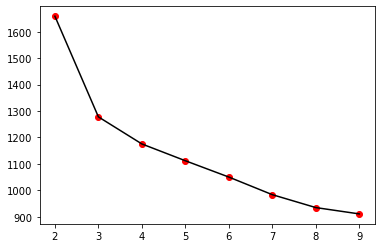

In [40]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [41]:
model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(wineNorm)

C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
wine3=wine

In [43]:
wine3["Norm_KMclustering"]=pd.Series(model_kmeans.labels_)

In [44]:
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Norm_hcluster,pca_hcluster,Norm_KMclustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,1,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,1,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,1,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,1,1


In [45]:
wine3["Norm_KMclustering"].value_counts()

2    65
0    62
1    51
Name: Norm_KMclustering, dtype: int64

In [46]:
nc1=[2,3,4,5,6,7,8,9]
iner1=[]    
for i in nc1:
    km1=KMeans(i)
    km1.fit(wineFinal.iloc[:,0:3])
    iner1.append(km1.inertia_)

C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

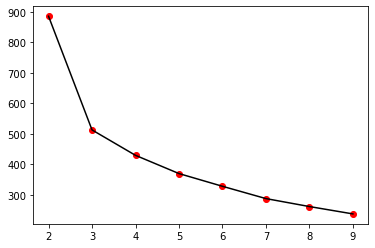

In [47]:
plt.plot(nc1,iner1,color="black")
plt.scatter(nc1,iner1,color="red")
plt.show()

In [48]:
model1_kmeans = KMeans(n_clusters=3) 
model1_kmeans.fit(wineFinal.iloc[:,0:3])

C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [49]:
wine4=wine
wine4["PCA_KMclustering"]=pd.Series(model1_kmeans.labels_)

In [50]:
wine4["PCA_KMclustering"].value_counts()

2    65
1    62
0    51
Name: PCA_KMclustering, dtype: int64